In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

import pystrata

from lampa.input import LPyStrataInput
from lampa.input import LTimeSeriesMotion
from lampa.input import LSoilType, LDarendeliSoilType
from lampa.input import LLayer
from lampa.project import LProject

### Διέγερση

In [2]:
# accel_filename = 'ATH49901T2.txt'
# filename = 'Kocaeli.txt'
# filename = 'Kocaeli.xlsx'
# filename = 'Kocaeli.csv'
accel_filename = 'ChiChi.txt'

ltsm = LTimeSeriesMotion.from_txt(accel_filename)
ltsm.description=accel_filename

### Εδαφικές στρώσεις

In [3]:
layers = list[LLayer]()


layers.append(LLayer(layer_type='DarendeliSoilType',
                  layer_properties=LDarendeliSoilType(name='Loose Sand', unit_wt=16.0, plas_index=0, ocr=1, stress_mean=40),
                  thickness=5,
                  shear_vel=140))

layers.append(LLayer(layer_type='DarendeliSoilType',
                  layer_properties=LDarendeliSoilType(name='Clay', unit_wt=18.0, plas_index=25, ocr=1, stress_mean=215),
                  thickness=15,
                  shear_vel=250))

layers.append(LLayer(layer_type='DarendeliSoilType',
                  layer_properties=LDarendeliSoilType(name='Dense Sand', unit_wt=20.0, plas_index=0, ocr=1, stress_mean=650),
                  thickness=30,
                  shear_vel=450))

layers.append(LLayer(layer_type='SoilType',
                  layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02),
                  thickness=0,
                  shear_vel=1200))



In [4]:
linput = LPyStrataInput(description='test equivalent linear elastic',
                      calculator_type = 'EquivalentLinearCalculator',    # LinearElasticCalculator
                      time_series_motion=ltsm,
                      layers=layers)

In [5]:
linput.layers

[LLayer(layer_type='DarendeliSoilType', layer_properties=LDarendeliSoilType(name='Loose Sand', unit_wt=16.0, plas_index=0, ocr=1, stress_mean=40, freq=1.0, num_cycles=10.0), thickness=5, shear_vel=140),
 LLayer(layer_type='DarendeliSoilType', layer_properties=LDarendeliSoilType(name='Clay', unit_wt=18.0, plas_index=25, ocr=1, stress_mean=215, freq=1.0, num_cycles=10.0), thickness=15, shear_vel=250),
 LLayer(layer_type='DarendeliSoilType', layer_properties=LDarendeliSoilType(name='Dense Sand', unit_wt=20.0, plas_index=0, ocr=1, stress_mean=650, freq=1.0, num_cycles=10.0), thickness=30, shear_vel=450),
 LLayer(layer_type='SoilType', layer_properties=LSoilType(name='Rock', unit_wt=23.0, damping=0.02), thickness=0, shear_vel=1200)]

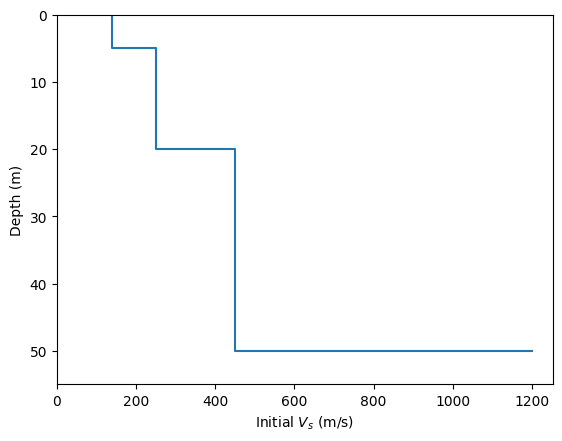

In [6]:
linput.to_pystrata_profile.plot("initial_shear_vel");

In [7]:
lproject = LProject(linput)

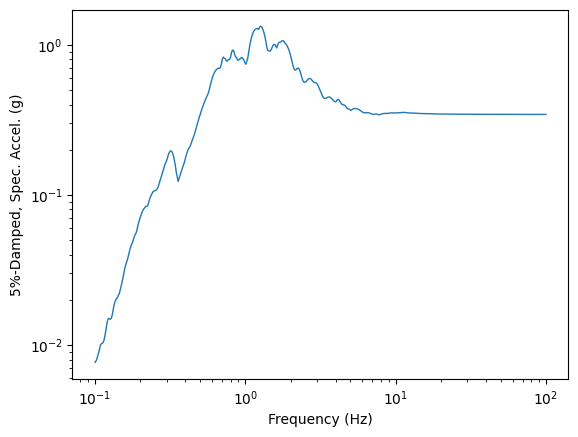

In [8]:
freqs = np.logspace(-1, 2, num=500)
lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=0).plot();

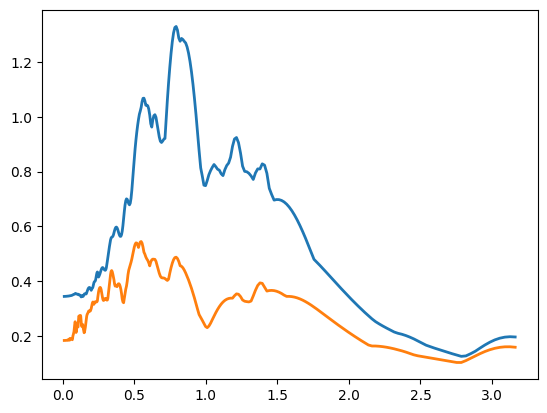

In [9]:
freqs = np.logspace(-0.5, 2, num=500)
# Στην επιφάνεια
out_index0 = lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=0)
# Στον βράχο
out_index1 = lproject.response_spectrum(freqs=freqs, damping=0.05, location_index=-1)
fig, ax = plt.subplots()
ax.plot(out_index0.periods, out_index0.values, linewidth=2.0);
ax.plot(out_index1.periods, out_index1.values, linewidth=2.0);

In [10]:
# df = pd.DataFrame({'x':out_index1.periods, 'y':out_index1.values})
# df.to_clipboard()

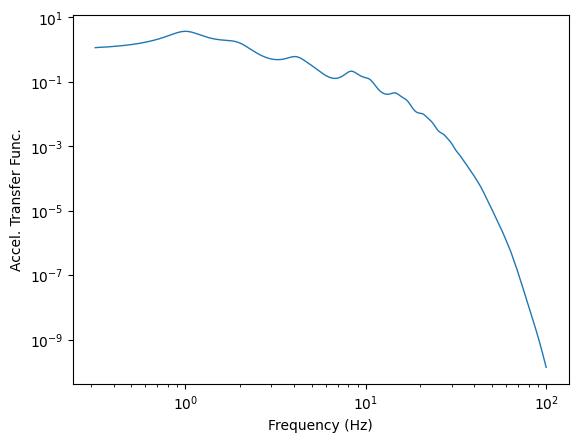

In [11]:
lproject.accel_transfer_function().plot();

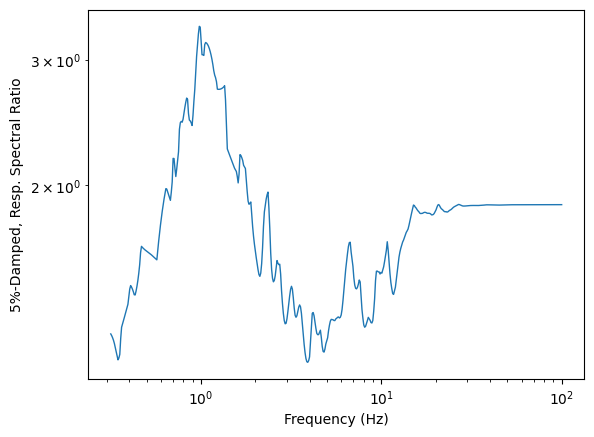

In [12]:
lproject.response_spectrum_ratio().plot();

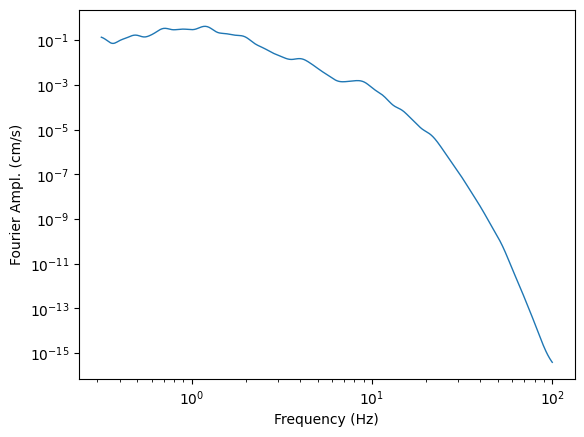

In [13]:
lproject.fourier_amplitude_spectrum().plot();

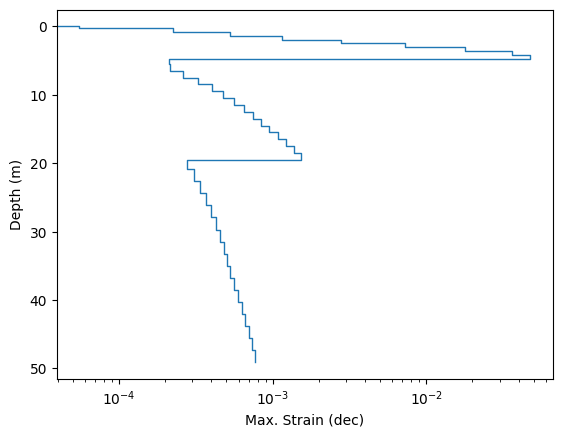

In [22]:
lproject.max_strain_prifile().plot(style="indiv");

In [15]:
linput.save_json_file('test_equivalent_linear_from_jupyter_998.json')

# with open('test_linear_elastic_from_jupyter_999.json', "w") as f:
#     f.write(LPyStrataInput.schema().dumps(linput))

D:\mypython_projects\lampa\.venv\lib\site-packages\dataclasses_json\mm.py:271: UserWarning: Unknown type <built-in function array> at LTimeSeriesMotion.accels: <built-in function array> It's advised to pass the correct marshmallow type to `mm_field`.
  warnings.warn(


In [16]:
# def save_json_file(l, filename: str):
#     """Save to json file"""
#     with open(filename, "w") as f:
#         f.write(LPyStrataInput.schema().dumps(l))

# def from_json_file(filename: str) -> "LPyStrataInput":
#     """Load from json file"""
#     with open(filename, "r") as f:
#         return LPyStrataInput.schema().loads(f.read())

In [17]:
# xxxx = LPyStrataInput.schema().dump(linput) 

In [18]:
# yyyy = LPyStrataInput.schema().load(xxxx) 